# **Analisis dan Prediksi Harga Rumah di Malang (lamudi.com)**

- Nama        : Lingga Rizki Mandala
- Email       : linggarizkim@gmail.com
- TETRIS-ID   : TETRIS-098
- Project     : DQLab TETRIS Batch 4 Capstone Project

## **Menentukan Pertanyaan Bisnis**

1. Berapa banyak penjualan rumah lamudi.com di Kabupaten Malang?
2. Kabupaten mana saja yang mendominasi penjualan rumah lamudi.com di Kabupaten Malang?
3. Berapa harga penjualan rumah lamudi.com setiap kabupaten di Kabupaten Malang?
4. Bagaimana memprediksi harga penjualan rumah lamudi.com di Kabupaten Malang?

## **Menyiapkan library yang dibutuhkan** 

In [1]:
#library data analisis dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#library sklearn untuk model machine learning & prediksi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

/tmp/ipykernel_35437/3054820076.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## **Data Wrangling**

### Load Dataset

Hasil dataset yang diambil dari webscraping lamudi.co.id

In [2]:
df = pd.read_csv('lamudi_malang_house.csv', encoding='ISO-8859-1')
df.head()

,title,location,detail,price,agent_name,agent_status,description
0,Rumah mewah termurah dekat kampus brawijaya,"Dinoyo, Malang",3 Kamar tidur ...,Rp662.000.000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,"Tulusrejo, Malang",10 Kamar tidur ...,Rp2.500.000.000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...
2,di jual rumah kost Exclusive kota malang Suhat...,"Lowokwaru, Malang",10 Kamar tidur ...,Rp2.900.000.000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,"Lowokwaru, Malang",2 Kamar tidur ...,Rp589.000.000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...
4,Dijual Rumah Butuh uang segera luas 231m di p...,"Blimbing, Malang",3 Kamar tidur ...,Rp650.000.000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2958 non-null   object
 1   location      2958 non-null   object
 2   detail        2958 non-null   object
 3   price         2958 non-null   object
 4   agent_name    2958 non-null   object
 5   agent_status  2958 non-null   object
 6   description   2958 non-null   object
dtypes: object(7)
memory usage: 161.9+ KB


In [4]:
print('Dataset terdiri dari', df.shape[0], 'baris dan', df.shape[1], 'kolom')

Dataset terdiri dari 2958 baris dan 7 kolom


Karena dataset diambil dari web scraping dan masih kotor, baiknya adalah kita melakukan assessing data untuk melihat null value dan data duplikat, serta melakukan cleaning untuk bisa dilakukan EDA.

### Assessing Data   

Mengecek null value dan data duplikat

In [5]:
df.isnull().sum()

title           0
location        0
detail          0
price           0
agent_name      0
agent_status    0
description     0
dtype: int64

In [6]:
print('Dataset mempunyai data duplikat sebanyak:', df.duplicated().sum())

Dataset mempunyai data duplikat sebanyak: 355


### Cleaning Data

Memecah location menjadi Kabupaten dan Kota

In [7]:
df[['kabupaten', 'kota']] = df['location'].str.split(r',', expand=True)
df = df.drop(['location'], axis=1)
df.head()

,title,detail,price,agent_name,agent_status,description,kabupaten,kota
0,Rumah mewah termurah dekat kampus brawijaya,3 Kamar tidur ...,Rp662.000.000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,10 Kamar tidur ...,Rp2.500.000.000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang
2,di jual rumah kost Exclusive kota malang Suhat...,10 Kamar tidur ...,Rp2.900.000.000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,2 Kamar tidur ...,Rp589.000.000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang
4,Dijual Rumah Butuh uang segera luas 231m di p...,3 Kamar tidur ...,Rp650.000.000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang


Mengubah nilai pada kolom detail

In [8]:
def cleaning(data):
    data = re.sub(r'[.,?]', " ", data)
    data = re.sub(r'[Rp|m²|Â|Lahan]', '', data)
    data = re.sub(r'\s+', '', data)
    return data

In [9]:
df['price'] = df['price'].apply(cleaning)
df['detail'] = df['detail'].apply(cleaning)
df.head()

,title,detail,price,agent_name,agent_status,description,kabupaten,kota
0,Rumah mewah termurah dekat kampus brawijaya,3Krtidur60Bgu69,662000000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,10Krtidur250Bgu103,2500000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang
2,di jual rumah kost Exclusive kota malang Suhat...,10Krtidur300Bgu103,2900000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,2Krtidur36Bgu72,589000000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang
4,Dijual Rumah Butuh uang segera luas 231m di p...,3Krtidur231Bgu231,650000000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang


Memecah kolom detail menjadi kolom kamar tidur, luas bangunan, dan luas lahan

In [10]:
df[['kamar tidur', 'luas bangunan', 'luas lahan']] = df['detail'].str.split(r"Krtidur|Bgu", expand=True)
df = df.drop(['detail'], axis = 1)
df.head()

,title,price,agent_name,agent_status,description,kabupaten,kota,kamar tidur,luas bangunan,luas lahan
0,Rumah mewah termurah dekat kampus brawijaya,662000000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang,3,60,69
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,2500000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang,10,250,103
2,di jual rumah kost Exclusive kota malang Suhat...,2900000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang,10,300,103
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,589000000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang,2,36,72
4,Dijual Rumah Butuh uang segera luas 231m di p...,650000000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang,3,231,231


Mengubah tipe data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2958 non-null   object
 1   price          2958 non-null   object
 2   agent_name     2958 non-null   object
 3   agent_status   2958 non-null   object
 4   description    2958 non-null   object
 5   kabupaten      2958 non-null   object
 6   kota           2757 non-null   object
 7   kamar tidur    2958 non-null   object
 8   luas bangunan  2958 non-null   object
 9   luas lahan     2956 non-null   object
dtypes: object(10)
memory usage: 231.2+ KB


Konversi tipe data price

In [12]:
try:
    df['price'] = df['price'].astype('int64')
except ValueError:
    print("Konversi tipe data gagal.")

Konversi tipe data kamar tidur

In [13]:
try:
    df['kamar tidur'] = df['kamar tidur'].astype('int64')
except ValueError:
    print("Konversi tipe data gagal.")

Konversi tipe data luas lahan

In [14]:
try:
    df['luas lahan'] = df['luas lahan'].astype('float64')
except ValueError:
    print("Konversi tipe data gagal.")

Konversi tipe data luas bangunan

In [15]:
try:
    df['luas bangunan'] = df['luas bangunan'].astype('int64')
except ValueError:
    print("Konversi tipe data gagal.")


Konversi tipe data gagal.


In [16]:
numeric_values = pd.to_numeric(df['luas bangunan'], errors='coerce')

# Mengganti kolom 'integer_column' dengan nilai numerik
df['luas bangunan'] = numeric_values

# Menghapus baris yang mengandung nilai non-numeric
df.dropna(subset=['luas bangunan'], inplace=True)

Melihat kembali hasil konversi tipe data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 0 to 2957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2956 non-null   object 
 1   price          2956 non-null   int64  
 2   agent_name     2956 non-null   object 
 3   agent_status   2956 non-null   object 
 4   description    2956 non-null   object 
 5   kabupaten      2956 non-null   object 
 6   kota           2756 non-null   object 
 7   kamar tidur    2956 non-null   int64  
 8   luas bangunan  2956 non-null   float64
 9   luas lahan     2956 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 254.0+ KB


Mengisi null value pada kolom Kota

In [18]:
#df['kota'] = df['kota'].fillna('Malang')
#df.isnull().sum()

## **Exploratory Data Analysis (EDA)**

### Statistical Summary

Hasil dataset setelah proses cleaning

In [19]:
df.head()

,title,price,agent_name,agent_status,description,kabupaten,kota,kamar tidur,luas bangunan,luas lahan
0,Rumah mewah termurah dekat kampus brawijaya,662000000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang,3,60.0,69.0
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,2500000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang,10,250.0,103.0
2,di jual rumah kost Exclusive kota malang Suhat...,2900000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang,10,300.0,103.0
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,589000000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang,2,36.0,72.0
4,Dijual Rumah Butuh uang segera luas 231m di p...,650000000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang,3,231.0,231.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 0 to 2957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2956 non-null   object 
 1   price          2956 non-null   int64  
 2   agent_name     2956 non-null   object 
 3   agent_status   2956 non-null   object 
 4   description    2956 non-null   object 
 5   kabupaten      2956 non-null   object 
 6   kota           2756 non-null   object 
 7   kamar tidur    2956 non-null   int64  
 8   luas bangunan  2956 non-null   float64
 9   luas lahan     2956 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 254.0+ KB


Hasil pengamatan:
1. Dataset terdiri dari 10 kolom dan 2956 baris.
2. Dataset memiliki 4 kolom numerik dan 6 kolom kategorik
3. Adanya null value pada kolom Kota diabaikan, karena kolom tersebut hanya value Malang dan tidak ada yang lain. Sehingga kita abaikan saja.

Memisahkan dataset kategorikal dan numerikal

In [21]:
cats = ['agent_status', 'kabupaten', 'kota']
nums = ['price', 'kamar tidur', 'luas bangunan', 'luas lahan']

Mendeskripsikan hasil dataset kategorikal dan numerikal

In [22]:
df[cats].describe()

,agent_status,kabupaten,kota
count,2956,2956,2756
unique,3,59,1
top,Rekan Lamudi Pro,Lowokwaru,Malang
freq,1489,724,2756


In [23]:
df[nums].describe()

,price,kamar tidur,luas bangunan,luas lahan
count,2.956000e+03,2956.000000,2956.000000,2956.000000
mean,2.168623e+09,4.158322,165.149188,168.013870
std,3.585460e+09,3.750416,237.118086,207.502746
min,1.000000e+08,1.000000,1.000000,1.000000
25%,5.990000e+08,2.000000,55.000000,72.000000
50%,1.025000e+09,3.000000,100.000000,104.000000
75%,2.300000e+09,4.000000,200.000000,180.000000
max,4.000000e+10,70.000000,8000.000000,2672.000000


### Univariate Analysis

Boxplot (numerikal)

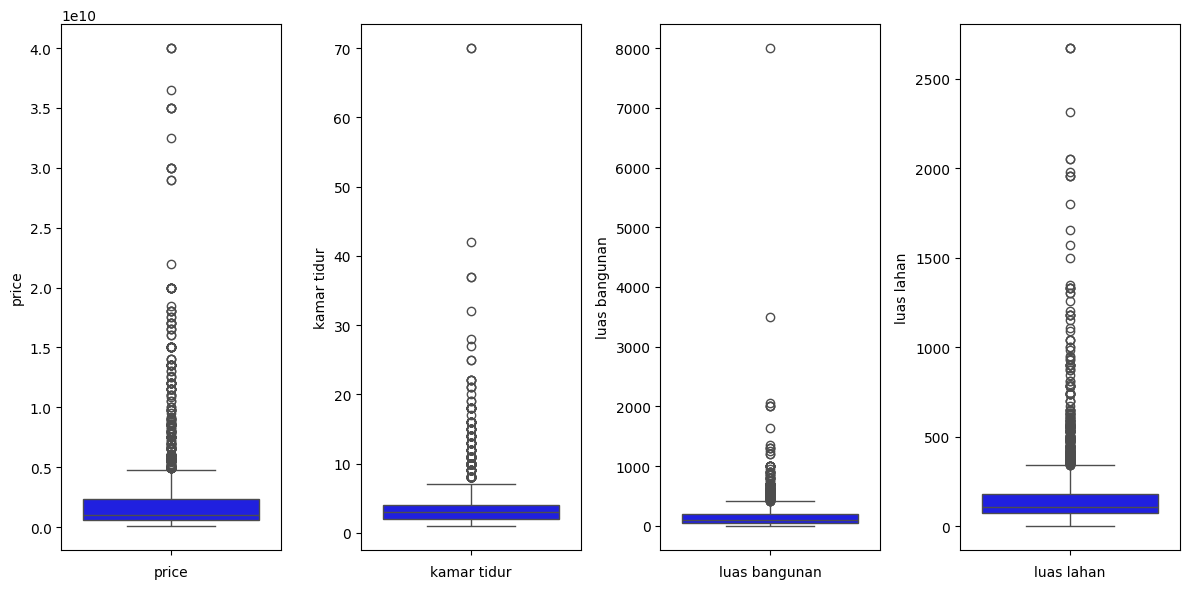

In [24]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.xlabel(nums[i])
    plt.tight_layout()

Distribution plot (numerikal)

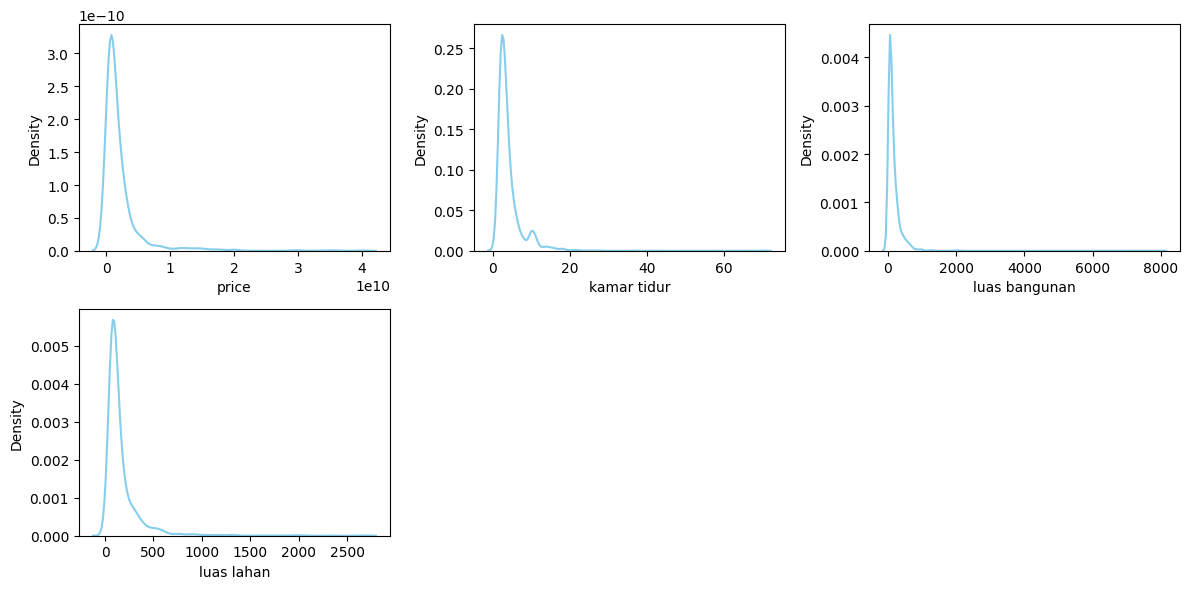

In [25]:
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Hasil Pengamatan:
1. terdapat outlier pada kolom numerik
2. distribusi kolom numerik cenderung skewness

Count plot (kategorikal)

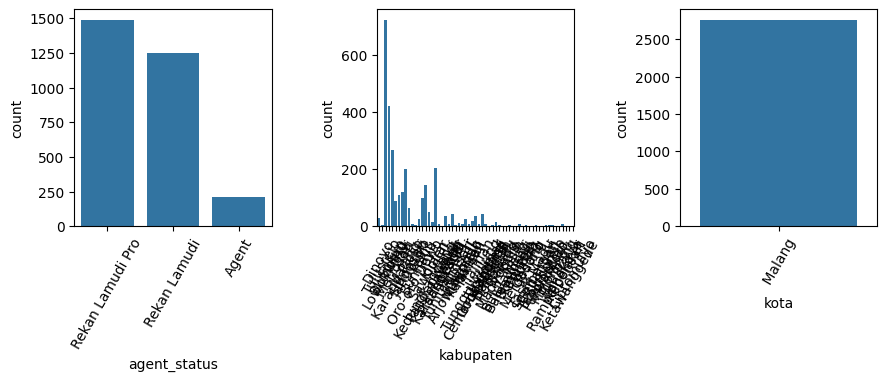

In [26]:
plt.figure(figsize=(12,10))
for i in range(0, len(cats)):
    plt.subplot(3, 4, i+1)
    sns.countplot(x=df[cats[i]])
    plt.xlabel(cats[i])
    plt.xticks(rotation=60)
    plt.tight_layout()

Hasil pengamatan : 
1. agent_status merupakan salah satu entitas yang terdapat pada platform lamudi, yaitu layanan yang diberikan oleh platform lamudi kepada agen penjualan. Perbedaannya hanya terdapat pada fitur dan layanan saja. Rekan Lamudi Pro adalah status tertinggi daripada yang lain, seperti member premium pada umumnya.

2. banyaknya kabupaten di Malang tidak bisa memperlihatkan semuanya, sehingga keterangan pada kabupaten menjadi tidak jelas. Untuk lebih memahaminya nanti akan dijabarkan pada explanatory analysis.

3. dataset ini difokuskan untuk kota Malang saja, sehingga kolom ini tidak terdapat value lain.

#### Multivariate Analysis

Heatmap

<Axes: >

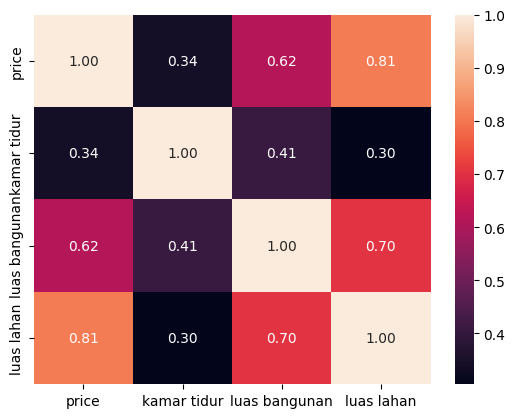

In [27]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")

Hasil pengamatan :
1. korelasi harga terhadap 

### Cleaning Data (after EDA)

Setelah melihat EDA, kita akan melakukan cleaning data lebih jauh karena masih banyak anomali data, khususnya data numerik. Karena akan berpengaruh pada explanatory analysis serta model nantinya.

In [28]:
# metode transformasi logaritmik
df['price_transform'] = np.log(df['price'])
df['kamar_tidur_transform'] = np.log(df['kamar tidur'])
df['luas_bangunan_transform'] = np.log(df['luas bangunan'])
df['luas_lahan_transform'] = np.log(df['luas lahan'])

In [29]:
## metode transformasi box-cox (not effective)
#from scipy.stats import boxcox

# price_transform, _ = boxcox(df['price'])
# kamar_tidur_transform, _ = boxcox(df['kamar tidur'])
# luas_bangunan_transform, _ = boxcox(df['luas bangunan'])
# luas_lahan_transform, _ = boxcox(df['luas lahan'])

# df['price_transform'] = price_transform
# df['kamar_tidur_transform'] = kamar_tidur_transform
# df['luas_bangunan_transform'] = luas_bangunan_transform
# df['luas_lahan_transform'] = luas_lahan_transform

In [30]:
df.describe()

,price,kamar tidur,luas bangunan,luas lahan,price_transform,kamar_tidur_transform,luas_bangunan_transform,luas_lahan_transform
count,2.956000e+03,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000
mean,2.168623e+09,4.158322,165.149188,168.013870,20.886203,1.222118,4.691661,4.805653
std,3.585460e+09,3.750416,237.118086,207.502746,1.030445,0.574649,0.863907,0.699033
min,1.000000e+08,1.000000,1.000000,1.000000,18.420681,0.000000,0.000000,0.000000
25%,5.990000e+08,2.000000,55.000000,72.000000,20.210772,0.693147,4.007333,4.276666
50%,1.025000e+09,3.000000,100.000000,104.000000,20.747958,1.098612,4.605170,4.644391
75%,2.300000e+09,4.000000,200.000000,180.000000,21.556175,1.386294,5.298317,5.192957
max,4.000000e+10,70.000000,8000.000000,2672.000000,24.412145,4.248495,8.987197,7.890583


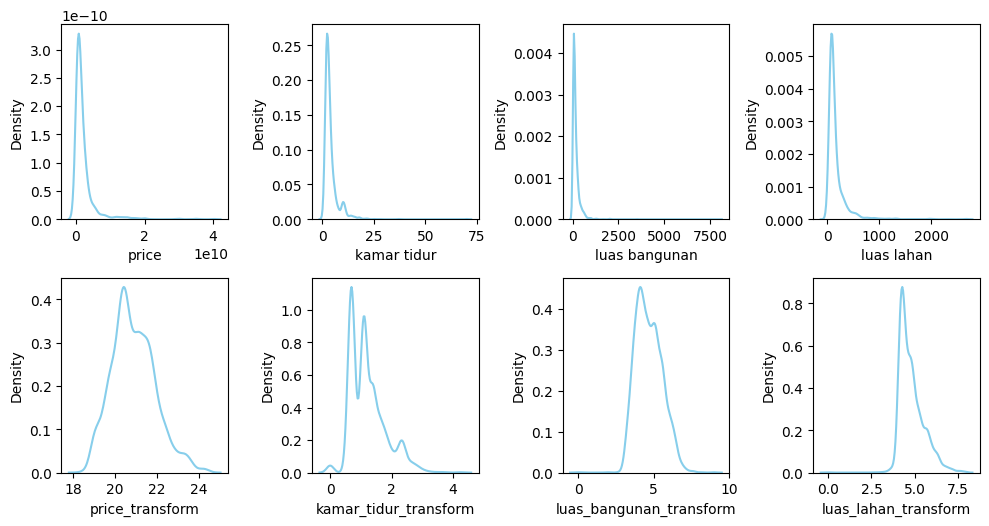

In [31]:
features = ['price', 'kamar tidur', 'luas bangunan', 'luas lahan', 'price_transform', 'kamar_tidur_transform', 'luas_bangunan_transform', 'luas_lahan_transform']

plt.figure(figsize=(10,10))
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

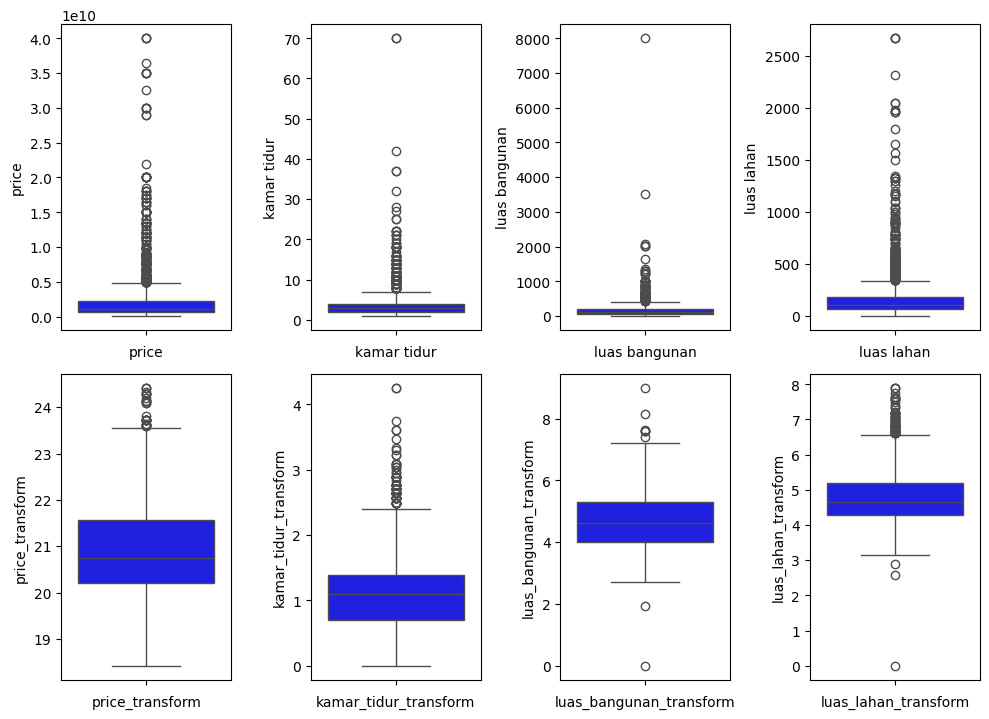

In [32]:
plt.figure(figsize=(10,14))
for i in range(0, len(features)):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.xlabel(features[i])
    plt.tight_layout()

## **Visualization & Explanatory Analysis**

In [33]:
df.head()

,title,price,agent_name,agent_status,description,kabupaten,kota,kamar tidur,luas bangunan,luas lahan,price_transform,kamar_tidur_transform,luas_bangunan_transform,luas_lahan_transform
0,Rumah mewah termurah dekat kampus brawijaya,662000000,Endang AJ Property,Rekan Lamudi Pro,MODERN RUMAH READY UNIT 2 LANTAI mulai 600juta...,Dinoyo,Malang,3,60.0,69.0,20.310776,1.098612,4.094345,4.234107
1,Di jual Rumah Kost Exclusive Kota Malang Suhat,2500000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Redy Redy 2 U...,Tulusrejo,Malang,10,250.0,103.0,21.639557,2.302585,5.521461,4.634729
2,di jual rumah kost Exclusive kota malang Suhat...,2900000000,Arif Faisol Halim,Rekan Lamudi,Di Jual Rumah kost Exclusive SHM Sisa 1 unit S...,Lowokwaru,Malang,10,300.0,103.0,21.787977,2.302585,5.703782,4.634729
3,Dijual Murah Rumah Aesthetic di Lowokwaru Deka...,589000000,Muhammad Sudono,Agent,Akses mobil bisa simpangan .Bisa KPR .Row jala...,Lowokwaru,Malang,2,36.0,72.0,20.193937,0.693147,3.583519,4.276666
4,Dijual Rumah Butuh uang segera luas 231m di p...,650000000,Fran Jual Rumah Malang,Rekan Lamudi Pro,Dijual Rumah luas 231m butuh uang segera lokas...,Blimbing,Malang,3,231.0,231.0,20.292483,1.098612,5.442418,5.442418


1. Berapa banyak penjualan rumah di Kabupaten Malang? (lamudi.com)

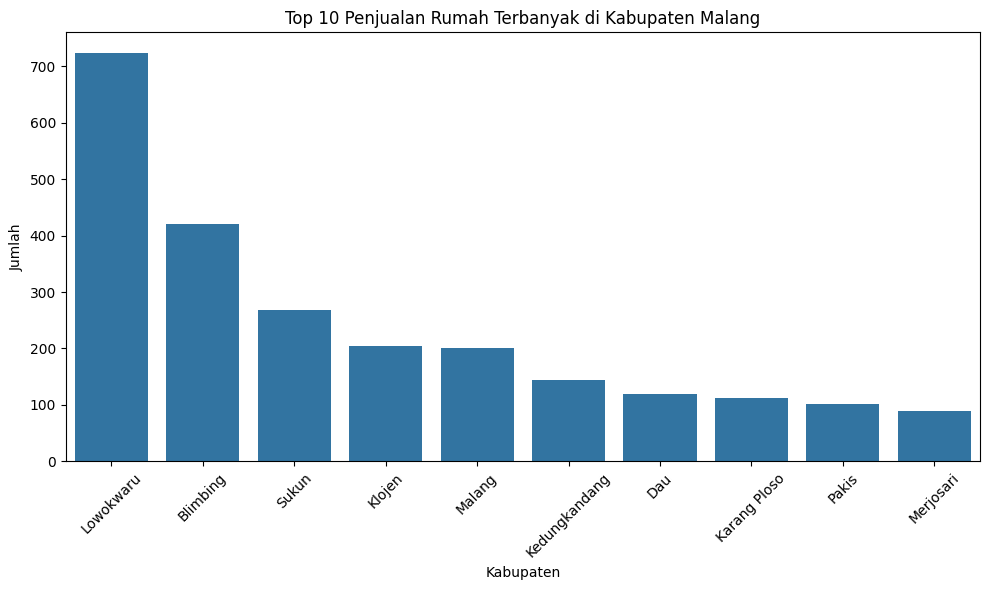

In [34]:
kabupaten = df['kabupaten'].value_counts().head(10)
top_10_kabupaten = df[df['kabupaten'].isin(kabupaten.index)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_kabupaten, x='kabupaten', order=kabupaten.index)
plt.title('Top 10 Penjualan Rumah Terbanyak di Kabupaten Malang')
plt.xlabel('Kabupaten')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Berapa banyak status agent lamudi.com di setiap Kabupaten Malang?

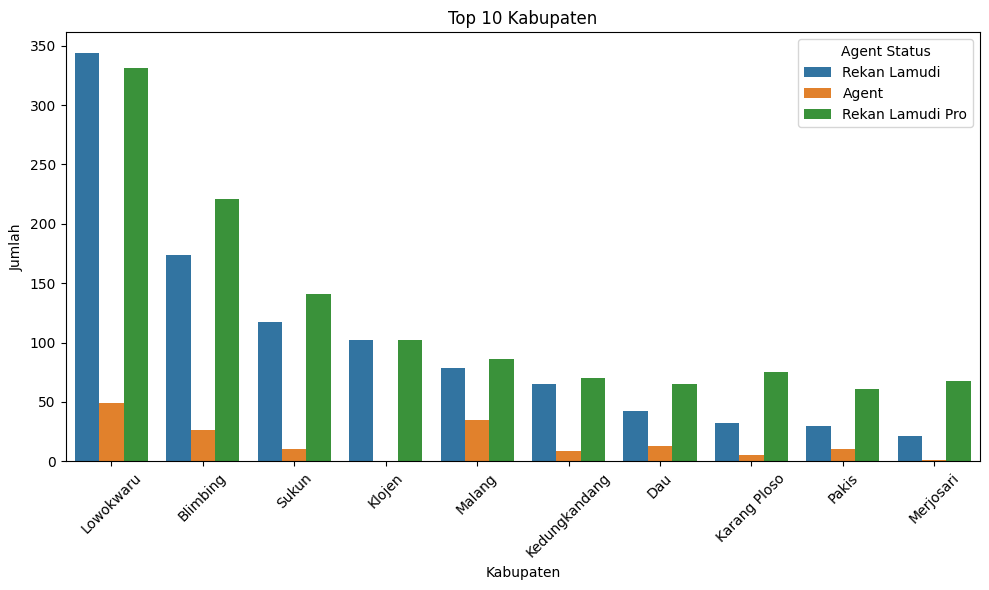

In [35]:

# Membuat plot menggunakan subset DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_kabupaten, x='kabupaten', hue='agent_status', order=kabupaten.index)
plt.title('Top 10 Kabupaten')
plt.xlabel('Kabupaten')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.legend(title='Agent Status')
plt.tight_layout()
plt.show()

## **Machine Learning**